# 02. Анализ данных

Содержание:
- Данные
- Форматы данных
- Визуализация
- Пропущенные значения
- Выбросы
- Ссылки

# 1. Данные

Машинное обучение невозможно без _данных_. Данные $-$ это любая информация. 
В машинное обучении данные обычно представляются в виде таблицы:
- строки $-$ это отдельные наблюдения (например, разные объекты, люди);
- столбцы $-$ это признаки или характеристики этих наблюдений.

#### Пример

| id | Фрукт    | Цвет       | Вкус         | Размер | Сорт |
|----|----------|------------|--------------|--------|------|
| 0  | Яблоко   | Красный    | Сладкий      | 10     | 1    |
| 1  | Яблоко   | Зелёный    | Кисло-сладкий| 7      | 2    |
| 2  | Банан    | Желтый     | Сладкий      | 15     | 2    |
| 3  | Апельсин | Оранжевый  | Кисло-сладкий| 6      | 2    |
| 4  | Киви     | Коричневый | Кисл-сладкий | 4      | 3    |
| 5  | Виноград | Зелёный    | Сладкий      | 1      | 1    |

## Типы данных (признаков)

![](https://www.dmitrymakarov.ru/wp-content/uploads/2022/05/types-of-data-1536x726.jpg)

[Источник: [Классификация данных и задачи EDA](https://www.dmitrymakarov.ru/data/data/)]

#### Категориальные признаки

Они представляют собой качественные характеристики, которые описывают принадлежность объекта к некоторой группе или категории. Они не являются числами в математическом смысле (над ними нельзя производить арифметические операции).

> Пример. В таблице выше это признаки `id`, `Фрукт`, `Цвет`, `Вкус`, `Сорт`

#### Номинальные признаки

Категории не имеют никакого внутреннего порядка или ранга. Это просто "имена".

> Пример. В таблице выше это признаки `id`, `Фрукт`, `Цвет`, `Вкус`

#### Порядковые

Категории имеют естественный, логический порядок, но разница между ними не измерена и не одинакова.

> Пример. В таблице выше это признак `Сорт`


#### Количественные (численные)

Они представляют собой количественные характеристики, выраженные числами. Над ними можно производить математические операции.
Могут быть _непрерывными_ (любые значения в заданном диапазоне, включая дробные) или _дискретными_  (отдельные, определенные значения, часто целые числа).

> Пример. В таблице выше это признак `Размер`

## Данные в pandas и numpy (Python)

В Python для работы с данными в виде таблицы используется библиотека `pandas`.
Её основной объект $-$ это `DataFrame`, который и представляет собой такую удобную таблицу.
(Есть ещё  `Series` $-$ это просто один столбец из такой таблицы.)

Библиотека `numpy` $-$ это основа для математических вычислений.
Её главный объект $-$ это многомерный массив `ndarray`, который обычно содержит числа одного типа.
В `pandas` используется `numpy` для эффективных вычислений.

Вот как это выглядит на практике.

In [1]:
import pandas as pd

data = {
    'id': [0, 1, 2, 3, 4, 5],
    'Фрукт': ['Яблоко', 'Яблоко', 'Банан', 'Апельсин', 'Киви', 'Виноград'],
    'Цвет': ['Красный', 'Зелёный', 'Желтый', 'Оранжевый', 'Коричневый', 'Зелёный'],
    'Вкус': ['Сладкий', 'Кисло-сладкий', 'Сладкий', 'Кисло-сладкий', 'Кисло-сладкий', 'Сладкий'],
    'Размер': [10, 7, 15, 6, 4, 1],
    'Сорт': [1, 2, 2, 2, 3, 1]
}

df = pd.DataFrame(data).set_index('id')
df

,Фрукт,Цвет,Вкус,Размер,Сорт
id,,,,,
0,Яблоко,Красный,Сладкий,10,1
1,Яблоко,Зелёный,Кисло-сладкий,7,2
2,Банан,Желтый,Сладкий,15,2
3,Апельсин,Оранжевый,Кисло-сладкий,6,2
4,Киви,Коричневый,Кисло-сладкий,4,3
5,Виноград,Зелёный,Сладкий,1,1


## Что можно делать с данными?

In [2]:
### Взглянуть на данные

# Показать первые 3 строки таблицы
print(df.head(3))

# Показать основные статистики по числовым столбцам (среднее, минимум, максимум и т.д.)
print(df.describe())

     Фрукт     Цвет           Вкус  Размер  Сорт
id                                              
0   Яблоко  Красный        Сладкий      10     1
1   Яблоко  Зелёный  Кисло-сладкий       7     2
2    Банан   Желтый        Сладкий      15     2
          Размер      Сорт
count   6.000000  6.000000
mean    7.166667  1.833333
std     4.875107  0.752773
min     1.000000  1.000000
25%     4.500000  1.250000
50%     6.500000  2.000000
75%     9.250000  2.000000
max    15.000000  3.000000


In [3]:
### Выбрать нужный столбец**

# Выбрать столбец "Фрукт" (вернётся объект Series)
names = df['Фрукт']
print("Столбец 'Фрукт':")
print(names)

Столбец 'Фрукт':
id
0      Яблоко
1      Яблоко
2       Банан
3    Апельсин
4        Киви
5    Виноград
Name: Фрукт, dtype: object


In [4]:
### Изменить тип данных у столбца

# Текущий тип данных в столбце
print(df['Размер'].dtype)
# Приведение к новому типу
df['Размер'] = df['Размер'].astype(float)
# Новый тип данных в столбце
print(df['Размер'].dtype)

int64
float64


In [5]:
### Добавить новый столбец

# Создадим новый столбец "Крупный фрукт", который будет True, если размер фрукта более 8 см
df['Крупный фрукт'] = df['Размер'] > 8.0
df

,Фрукт,Цвет,Вкус,Размер,Сорт,Крупный фрукт
id,,,,,,
0,Яблоко,Красный,Сладкий,10.0,1,True
1,Яблоко,Зелёный,Кисло-сладкий,7.0,2,False
2,Банан,Желтый,Сладкий,15.0,2,True
3,Апельсин,Оранжевый,Кисло-сладкий,6.0,2,False
4,Киви,Коричневый,Кисло-сладкий,4.0,3,False
5,Виноград,Зелёный,Сладкий,1.0,1,False


In [6]:
### Выполнить простое вычисление с помощью numpy

import numpy as np

# Предположим, у нас есть массив numpy c ценами
prices = np.array([2.5, 1.0, 1.5, 3.0, 4.0, 3.5])
# Добавим новый столбец
df['Цена'] = prices
# Скидки на фрукты
discounts = np.array([0.9, 0.9, 0.8, 0.75, 0.8, 1.0])
# Применим скидки
df['Цена'] *= discounts
df

,Фрукт,Цвет,Вкус,Размер,Сорт,Крупный фрукт,Цена
id,,,,,,,
0,Яблоко,Красный,Сладкий,10.0,1,True,2.25
1,Яблоко,Зелёный,Кисло-сладкий,7.0,2,False,0.90
2,Банан,Желтый,Сладкий,15.0,2,True,1.20
3,Апельсин,Оранжевый,Кисло-сладкий,6.0,2,False,2.25
4,Киви,Коричневый,Кисло-сладкий,4.0,3,False,3.20
5,Виноград,Зелёный,Сладкий,1.0,1,False,3.50


> Домашняя работа. Попробуй создать свои собственные данные для анализа. Вот несколько идей:
> 1. Одноклассники: создай таблицу с именами друзей, их возрастом, любимым предметом и средним баллом.
> 2. Погода: зафиксируй данные о температуре, облачности и осадках за неделю.
> 3. Карманные деньги: запиши, сколько денег ты тратишь в неделю на разные категории (еда, развлечения, транспорт).

# 2. Форматы данных

Популярные используемые форматы данных в машинное обучение: `csv`, `tsv`, `json`, `jsonl`, `yaml`, `pickle`.
За исключением `pickle` остальные форматы человекочитаемые.

- [csv](https://ru.wikipedia.org/wiki/CSV) (Comma-Separated Values): текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми
- [tsv](https://ru.wikipedia.org/wiki/TSV) (Tab-Separated Values):  текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных символами табуляции (`\t`)
- [json](https://ru.wikipedia.org/wiki/JSON) (JavaScript Object Notation): текстовый формат обмена данными, основанный на JavaScript. Несмотря на происхождение от JavaScript, формат считается независимым от языка и может использоваться практически с любым языком программирования
- [jsonl](https://jsonlines.org/) (JSON Lines): текстовые формат, в котором каждая строка является самостоятельным json-объектом
- [yaml](https://ru.wikipedia.org/wiki/YAML) (YAML Ain't Markup Language): текстовые формат обмена данными, ориентированный на удобство ввода-вывода типичных структур данных многих языков программирования
- [pickle](https://docs.python.org/3/library/pickle.html): формат и python-пакет для сериализации объектов языка python

> Сейчас формат `csv` понимается более широко, чем изначально, и допускаются различные разделители, в частности `\t`. В частности, формат `tsv` становится частным случаем формата `csv`.

Далее более подробно поговорим о формате `csv`.

## Формат `csv`

- Текстовый файл
- Каждая строка = запись
- Столбцы разделены _разделителем_
- Первая строка часто (но необязательно) = заголовки

Разделители:
- `,` - запятая (стандарт)
- `;` - точка с запятой  
- `\t` - табуляция (TSV)
- `|` - вертикальная черта
- пробел

Пример:

```
Фрукт,Цвет,Вкус,Размер,Сорт,Крупный фрукт,Цена
Яблоко,Красный,Сладкий,10.0,1,True,2.25
Яблоко,Зелёный,Кисло-сладкий,7.0,2,False,0.9
Банан,Желтый,Сладкий,15.0,2,True,1.2000000000000002
Апельсин,Оранжевый,Кисло-сладкий,6.0,2,False,2.25
Киви,Коричневый,Кисл-сладкий,4.0,3,False,3.2
Виноград,Зелёный,Сладкий,1.0,1,False,3.5
```

Особенности:
- Кавычки для данных с разделителем: `"Иванов, Иван"`
- Кодировка (`UTF-8`, `Windows-1251`)
- Перенос строки = новая запись

## Сохрание в формат `csv`

Самое простое и быстрое $-$ использовать метод `to_csv` из `pandas`:

In [7]:
df.to_csv('fruits.csv')

Много настроек

```python
DataFrame.to_csv(path_or_buf=None, *, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', lineterminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)
```

Подробное описание полей: [pandas.DataFrame.to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

## Чтение из формата `csv`

Самое простое и быстрое $-$ использовать метод `read_csv` из `pandas`:

In [8]:
df_read = pd.read_csv('fruits.csv')
df_read

,id,Фрукт,Цвет,Вкус,Размер,Сорт,Крупный фрукт,Цена
0,0,Яблоко,Красный,Сладкий,10.0,1,True,2.25
1,1,Яблоко,Зелёный,Кисло-сладкий,7.0,2,False,0.90
2,2,Банан,Желтый,Сладкий,15.0,2,True,1.20
3,3,Апельсин,Оранжевый,Кисло-сладкий,6.0,2,False,2.25
4,4,Киви,Коричневый,Кисло-сладкий,4.0,3,False,3.20
5,5,Виноград,Зелёный,Сладкий,1.0,1,False,3.50


Много настроек

```python
pandas.read_csv(filepath_or_buffer, *, sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=<no_default>, skip_blank_lines=True, parse_dates=None, infer_datetime_format=<no_default>, keep_date_col=<no_default>, date_parser=<no_default>, date_format=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors='strict', dialect=None, on_bad_lines='error', delim_whitespace=<no_default>, low_memory=True, memory_map=False, float_precision=None, storage_options=None, dtype_backend=<no_default>)
```

Подробное описание полей: [pandas.DataFrame.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

# 3. Визуализация

Если задача машинного обучения рутинная, то решение идёт по известному алгоритму.
Если задача является новой и требуется сначала сформулировать гипотезу, то часто для этого помогает визуализация.

Визуализация данных — это представление информации графическом виде, чтобы было проще увидеть закономерности, тренды и выбросы в данных.

Например, по таблице с цислами сложно сразу понять, как эти числа меняются, какие есть закономерности, сложные они или простые. Но если построить график, картина становится яснее. Визуализация помогает:
- увидеть тенденции: например, как растём успеваемость по математике в течение года;
- сравнить значения: например, какое мороженое в классе любят больше — шоколадное или ванильное;
- сделать открытия: на графике можно заметить что-то неочевидное в данных, что не бросается в глаза в таблице.

Основной инструмент — библиотека `matplotlib`.

`matplotlib` умеет строить множество типов графиков. Вот самые полезные для начала:
- Линейный график (`plot`): показывает, как данные меняются во времени или в зависимости от другого параметра.
- Круговая диаграмма (`pie`): показывает доли целого (например, проценты).
- Столбчатая диаграмма (`bar`): сравнения разных категорий.
- Точечная диаграмма (`scatter`): показывает взаимосвязь между двумя переменными.

Подробнее: [matplotlib.org](https://matplotlib.org/)

## Пример линейного графика

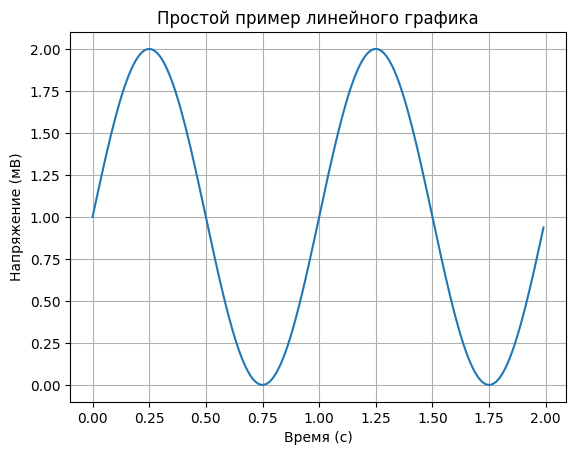

In [9]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np

# Создадим данные с помощью NumPy
# t - это массив из 200 точек от 0 до 2
t = np.arange(0.0, 2.0, 0.01)
# s - значения синуса для каждой точки t
s = 1 + np.sin(2 * np.pi * t)

# Создаём линейный график
plt.plot(t, s)

# Добавляем подписи осей и заголовок
plt.xlabel('Время (с)')
plt.ylabel('Напряжение (мВ)')
plt.title('Простой пример линейного графика')
plt.grid(True) # Включаем сетку для удобства

# Показываем график
plt.show()

# Несколько графиков одновременно

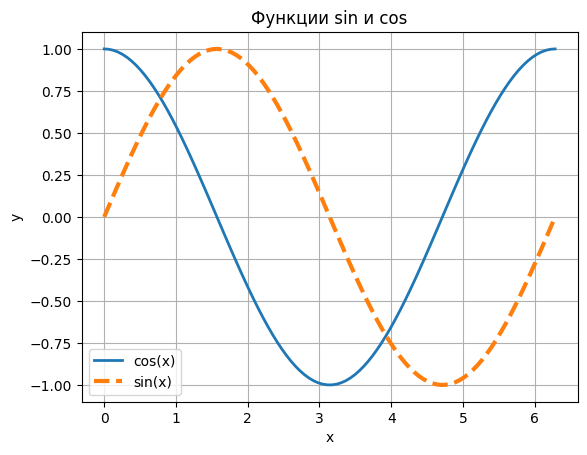

In [10]:
# Генерируем данные
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.cos(x)
y2 = np.sin(x)

# Строим два графика на одном полотне
plt.plot(x, y1, label='cos(x)', linestyle='-', linewidth=2)
plt.plot(x, y2, label='sin(x)', linestyle='--', linewidth=3)

plt.legend() # Добавляем легенду, чтобы было понятно, какая линия что означает
plt.title('Функции sin и cos')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Пример столбчатой диаграммы

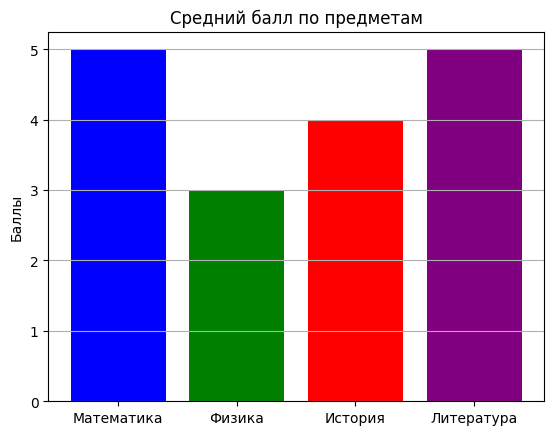

In [11]:
# Данные: названия предметов и средний балл
subjects = ['Математика', 'Физика', 'История', 'Литература']
grades = [5, 3, 4, 5]

plt.bar(subjects, grades, color=['blue', 'green', 'red', 'purple'])
plt.title('Средний балл по предметам')
plt.ylabel('Баллы')
plt.grid(True, axis='y') # Сетка только по вертикали
plt.show()

## Пример круговой диаграммы

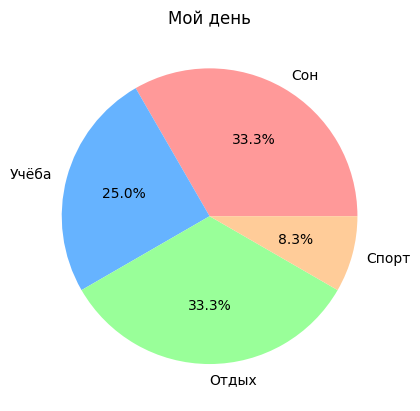

In [12]:
# Данные о распределении времени в сутках
activities = ['Сон', 'Учёба', 'Отдых', 'Спорт']
spent_time = [8, 6, 8, 2]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.pie(spent_time, labels=activities, autopct='%1.1f%%', colors=colors)
plt.title('Мой день')
plt.show()

## Пример точечной диаграммы

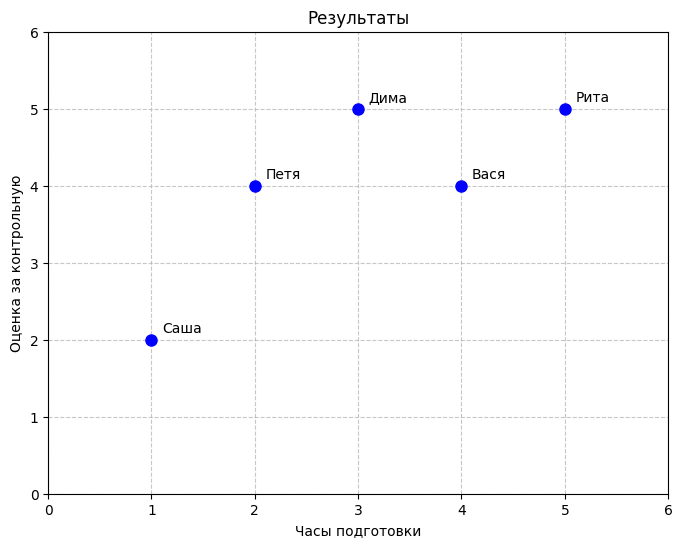

In [13]:
# Данные
hours = [1, 2, 3, 4, 5]
grades = [2, 4, 5, 4, 5]
students = ['Саша', 'Петя', 'Дима', 'Вася', 'Рита']

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(hours, grades, 'bo', markersize=8)

# Подписи осей и заголовок
plt.xlabel('Часы подготовки')
plt.ylabel('Оценка за контрольную')
plt.title('Результаты')

# Добавление имен рядом с точками
for i, student in enumerate(students):
    plt.text(hours[i] + 0.1, grades[i] + 0.1, student)

# Сетка и ограничения осей
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 6)
plt.ylim(0, 6)

plt.show()

# 4. Пропущенные значения

Пропущенные значения — это очень распространённое явление в реальных данных. Они возникают, когда информация по какому-то признаку не была записана, потерялась или не применима к конкретному наблюдению.

Отсутствие значений может стать припятствием для работы многих алгоритмов.

Работа с таблицами `pandas` или `numpy` можно встретить:
- `NaN` (Not a Number) — для числовых данных
- `None` — для объектов Python
- `NaT` (Not a Time) — для дат и времени

In [14]:
# Создадим DataFrame с пропущенными значениями

data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Мария', 'Дмитрий'],
    'Возраст': [15, np.nan, 16, 17, np.nan],
    'Город': ['Москва', 'Санкт-Петербург', np.nan, 'Москва', 'Казань'],
    'Математика': [4, 5, np.nan, 5, 4],
    'Физика': [5, np.nan, 4, 4, np.nan],
    'Химия': [3, 4, 5, np.nan, 5]
}

df = pd.DataFrame(data)
df

,Имя,Возраст,Город,Математика,Физика,Химия
0,Анна,15.0,Москва,4.0,5.0,3.0
1,Борис,NaN,Санкт-Петербург,5.0,NaN,4.0
2,Виктор,16.0,NaN,NaN,4.0,5.0
3,Мария,17.0,Москва,5.0,4.0,NaN
4,Дмитрий,NaN,Казань,4.0,NaN,5.0


## Обнаружение пропущенных значений

In [15]:
# Показывает информацию о DataFrame, включая количество non-null значений
print("Информация о DataFrame:")
print(df.info())

# Показывает сумму пропущенных значений по каждому столбцу
print("\n\n\nСумма пропущенных значений по столбцам:")
print(df.isnull().sum())

# Показывает общее количество пропусков
print(f"\nВсего пропущенных значений: {df.isnull().sum().sum()}")

Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Имя         5 non-null      object 
 1   Возраст     3 non-null      float64
 2   Город       4 non-null      object 
 3   Математика  4 non-null      float64
 4   Физика      3 non-null      float64
 5   Химия       4 non-null      float64
dtypes: float64(4), object(2)
memory usage: 368.0+ bytes
None



Сумма пропущенных значений по столбцам:
Имя           0
Возраст       2
Город         1
Математика    1
Физика        2
Химия         1
dtype: int64

Всего пропущенных значений: 7


## Визуализация пропусков

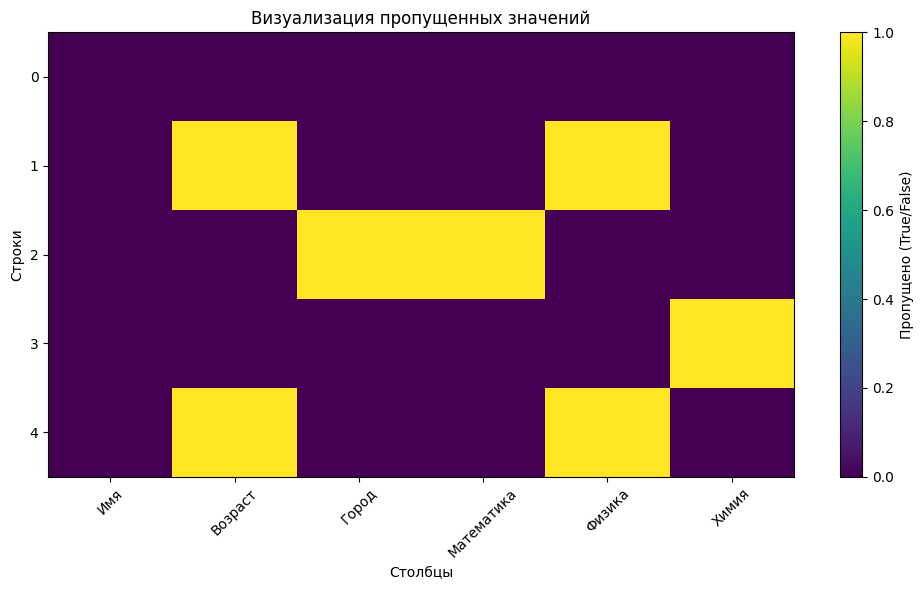

In [16]:
# Визуализация пропущенных значений
plt.figure(figsize=(10, 6))

# Создаем heatmap пропусков
plt.imshow(df.isnull(), cmap='viridis', aspect='auto')
plt.colorbar(label='Пропущено (True/False)')
plt.title('Визуализация пропущенных значений')
plt.xlabel('Столбцы')
plt.ylabel('Строки')

# Подписываем оси
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df)), df.index)

plt.tight_layout()
plt.show()

## Методы обработки пропущенных значений

### Удаление пропусков

In [17]:
# Удаление строк, где ВСЕ значения пропущены
df_cleaned_all = df.dropna(how='all')
print("После удаления строк со всеми пропусками:", df_cleaned_all.shape)

# Удаление строк, где ХОТЯ БЫ ОДНО значение пропущено
df_cleaned_any = df.dropna(how='any')
print("После удаления строк с любыми пропусками:", df_cleaned_any.shape)

# Удаление строк, где пропущены значения в конкретных столбцах
df_cleaned_subset = df.dropna(subset=['Возраст', 'Математика'])
print("После удаления строк с пропусками в 'Возраст' или 'Математика':", df_cleaned_subset.shape)

После удаления строк со всеми пропусками: (5, 6)
После удаления строк с любыми пропусками: (1, 6)
После удаления строк с пропусками в 'Возраст' или 'Математика': (2, 6)


In [18]:
df_cleaned_any

,Имя,Возраст,Город,Математика,Физика,Химия
0,Анна,15.0,Москва,4.0,5.0,3.0


### Заполнение пропусков константными значениями

In [19]:
# Заполнение пропусков нулями
df_filled_zeros = df.fillna(0)
df_filled_zeros

,Имя,Возраст,Город,Математика,Физика,Химия
0,Анна,15.0,Москва,4.0,5.0,3.0
1,Борис,0.0,Санкт-Петербург,5.0,0.0,4.0
2,Виктор,16.0,0,0.0,4.0,5.0
3,Мария,17.0,Москва,5.0,4.0,0.0
4,Дмитрий,0.0,Казань,4.0,0.0,5.0


In [20]:
# Заполнение разными значениями для разных столбцов
fill_values = {
    'Возраст': df['Возраст'].mean(),  # средним возрастом
    'Город': 'Неизвестно',            # строкой
    'Математика': df['Математика'].median(),  # медианой
    'Физика': df['Физика'].mean(),    # средним
    'Химия': 0                        # нулем
}
df_filled_custom = df.fillna(fill_values)
df_filled_custom

,Имя,Возраст,Город,Математика,Физика,Химия
0,Анна,15.0,Москва,4.0,5.000000,3.0
1,Борис,16.0,Санкт-Петербург,5.0,4.333333,4.0
2,Виктор,16.0,Неизвестно,4.5,4.000000,5.0
3,Мария,17.0,Москва,5.0,4.000000,0.0
4,Дмитрий,16.0,Казань,4.0,4.333333,5.0


### Заполнение статистиками

In [21]:
# Заполнение средним значением (для числовых столбцов)
df_filled_mean = df.copy()
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled_mean[numeric_columns] = df_filled_mean[numeric_columns].fillna(df_filled_mean[numeric_columns].mean())
df_filled_mean

,Имя,Возраст,Город,Математика,Физика,Химия
0,Анна,15.0,Москва,4.0,5.000000,3.00
1,Борис,16.0,Санкт-Петербург,5.0,4.333333,4.00
2,Виктор,16.0,NaN,4.5,4.000000,5.00
3,Мария,17.0,Москва,5.0,4.000000,4.25
4,Дмитрий,16.0,Казань,4.0,4.333333,5.00


In [22]:
# Заполнение медианой (устойчиво к выбросам)
df_filled_median = df.copy()
df_filled_median[numeric_columns] = df_filled_median[numeric_columns].fillna(df_filled_median[numeric_columns].median())
df_filled_median

,Имя,Возраст,Город,Математика,Физика,Химия
0,Анна,15.0,Москва,4.0,5.0,3.0
1,Борис,16.0,Санкт-Петербург,5.0,4.0,4.0
2,Виктор,16.0,NaN,4.5,4.0,5.0
3,Мария,17.0,Москва,5.0,4.0,4.5
4,Дмитрий,16.0,Казань,4.0,4.0,5.0


## Советы по выбору стратегии

### Когда удалять пропуски:
- Пропусков очень мало (< 5%)
- Удаление не приведет к потере важной информации
- Данных достаточно для анализа после удаления

### Когда заполнять пропуски:
- Пропусков умеренное количество
- Данные имеют закономерности
- Нужно сохранить все наблюдения

### Как выбирать метод заполнения:
- Среднее/медиана: для нормально распределенных данных
- Мода: для категориальных данных
- Интерполяция: для временных рядов
- Групповые статистики: когда данные зависят от категорий

# 5. Выбросы

Выбросы — это значения, которые значительно отличаются от остальных наблюдений в данных. Они могут быть вызваны ошибками измерений, редкими событиями или просто уникальными случаями.

Выбросы — это экстремальные значения, которые лежат далеко за пределами основной массы данных. Они могут:
- Искажать статистические показатели (среднее, стандартное отклонение)
- Влиять на модели машинного обучения
- Скрывать важные закономерности в данных

## Создадим выбросы

In [23]:
import seaborn as sns

# Создадим нормальные данные
np.random.seed(42)
normal_data = np.random.normal(100, 15, 100)  # среднее=100, std=15

# Добавим выбросы
outliers = np.array([25, 45, 180, 200, 220])
data_with_outliers = np.concatenate([normal_data, outliers])

# Создаем DataFrame
df = pd.DataFrame({
    'значения': data_with_outliers,
    'тип': ['нормальные'] * 100 + ['выбросы'] * 5
})

print("Описательная статистика данных:")
print(df['значения'].describe())

Описательная статистика данных:
count    105.000000
mean     100.135526
std       23.628223
min       25.000000
25%       90.974401
50%       98.265276
75%      107.699011
max      220.000000
Name: значения, dtype: float64


## Гистограмма с выбросами

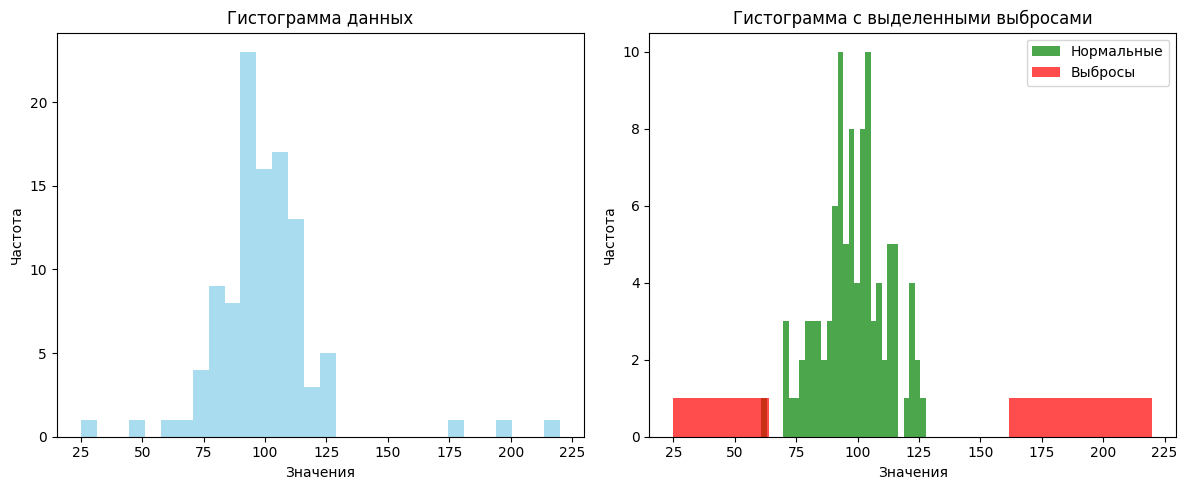

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['значения'], bins=30, alpha=0.7, color='skyblue')
plt.title('Гистограмма данных')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
# Отдельно нормальные данные и выбросы
normal = df[df['тип'] == 'нормальные']['значения']
outliers = df[df['тип'] == 'выбросы']['значения']

plt.hist(normal, bins=30, alpha=0.7, label='Нормальные', color='green')
plt.hist(outliers, bins=10, alpha=0.7, label='Выбросы', color='red')
plt.title('Гистограмма с выделенными выбросами')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

## Выбросы на точечной диаграмме

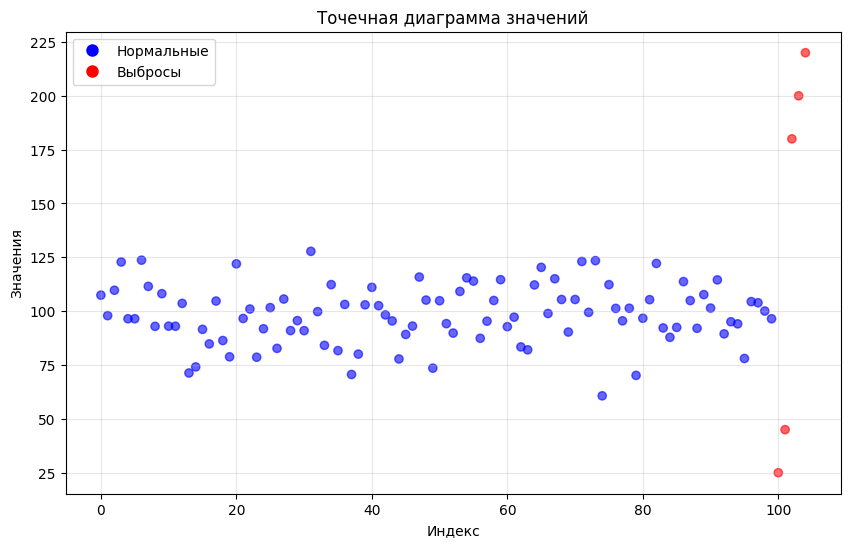

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['значения'], 
           c=df['тип'].map({'нормальные': 'blue', 'выбросы': 'red'}),
           alpha=0.6)
plt.title('Точечная диаграмма значений')
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Нормальные'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Выбросы')
])
plt.grid(True, alpha=0.3)
plt.show()

## Статистические методы обнаружения выбросов (на примере Z-score)

In [26]:
def find_outliers_zscore(data, column, threshold=3):
    """Находит выбросы с помощью Z-score"""
    from scipy import stats
    
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    
    print(f"=== Z-score анализ для {column} ===")
    print(f"Пороговое значение Z-score: {threshold}")
    print(f"Найдено выбросов: {len(outliers)}")
    print(f"Процент выбросов: {len(outliers)/len(data)*100:.2f}%")
    print(f"Z-scores выбросов: {z_scores[z_scores > threshold]}")
    
    return outliers, z_scores

# Применяем Z-score метод
outliers_zscore, z_scores = find_outliers_zscore(df, 'значения')

=== Z-score анализ для значения ===
Пороговое значение Z-score: 3
Найдено выбросов: 4
Процент выбросов: 3.81%
Z-scores выбросов: 100    3.195157
102    3.396257
103    4.246762
104    5.097267
Name: значения, dtype: float64


## Советы по работе с выбросами

### Когда обращать внимание на выбросы:
- Обрабатывать: когда выбросы вызваны ошибками в данных
- Исследовать: когда выбросы представляют интересные случаи
- Сохранять: когда выбросы важны для бизнес-логики

### Методы обнаружения для разных типов данных:
- Нормальное распределение: Z-score, IQR
- Произвольное распределение: MAD, IQR
- Многомерные данные: методы кластеризации (DBSCAN, Isolation Forest)

# Ссылки

- [10 простых визуализаций данных в Python для детей](https://www.progkids.com/blog/10-prostyh-vizualizacij-dannyh-v-python-dlya-detej)
- [Библиотека Matplotlib для построения графиков](https://skillbox.ru/media/code/biblioteka-matplotlib-dlya-postroeniya-grafikov/)
- [CSV - что это за формат файла и как с ним работать](https://blog.skillfactory.ru/glossary/csv-format/)
- [Как вычислить выбросы](https://ru.wikihow.com/%D0%B2%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D0%B8%D1%82%D1%8C-%D0%B2%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B)